In [1]:
import logging as lg
from pathlib import Path
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
verbose=True
BATCH_SIZE=100
VALID_RATE=0.3

RESULT_DIR=Path(f"result/mnist_{BATCH_SIZE}_{VALID_RATE}")
if verbose:
    lg.getLogger().setLevel(lg.INFO)
    lg.info("Verbose mode activated")

INFO:root:Verbose mode activated


In [3]:
from tools.models import CNNClassifier,MLPClassifier

In [4]:
def reshape_mnist_mlp(x,y):
    sample_num=x.shape[0]
    x=x.reshape(sample_num, -1)
    x= x.astype('float32')
    x /= 255
    y = to_categorical(y, 10)
    return x,y

In [5]:
def reshape_mnist_cnn(x,y):
    sample_num=x.shape[0]
    x=x.reshape(sample_num, 28,28,1)
    x= x.astype('float32')
    x /= 255
    y = to_categorical(y, 10)
    return x,y

In [19]:
from sklearn.model_selection import train_test_split
(x_train_val, y_train_val), (x_test, y_test) = mnist.load_data()

x_train_val_mlp,y_train_val_mlp=reshape_mnist_mlp(x_train_val,y_train_val)
X_test_mlp,y_test_mlp=reshape_mnist_mlp(x_test,y_test)

x_train_val_cnn,y_train_val_cnn=reshape_mnist_cnn(x_train_val,y_train_val)
X_test_cnn,y_test_cnn=reshape_mnist_cnn(x_test,y_test)


X_train_mlp, X_valid_mlp, y_train_mlp, y_valid_mlp = train_test_split(x_train_val_mlp, y_train_val_mlp, test_size=VALID_RATE)
X_train_cnn, X_valid_cnn, y_train_cnn, y_valid_cnn = train_test_split(x_train_val_cnn, y_train_val_cnn, test_size=VALID_RATE)


In [11]:
X_train_mlp.shape,X_train_cnn.shape

((42000, 784), (42000, 28, 28, 1))

In [12]:
mlp=MLPClassifier(input_dim=784,output_dim=10,result_dir=RESULT_DIR)
cnn=CNNClassifier(input_height=28,input_width=28,input_channels=1,result_dir=RESULT_DIR)

INFO:root:Not found such a trained model.
INFO:root:Creating new model...
INFO:root:Finished.
INFO:root:Not found such a trained model.
INFO:root:Creating new model...
INFO:root:Finished.


In [13]:
mlp_history=mlp.fit(X_train=X_train_mlp,y_train=y_train_mlp,epochs=10,batch_size=BATCH_SIZE,X_valid=X_valid_mlp,y_valid=y_valid_mlp)
cnn_history=cnn.fit(X_train=X_train_cnn,y_train=y_train_cnn,epochs=10,batch_size=BATCH_SIZE,X_valid=X_valid_cnn,y_valid=y_valid_cnn)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 62us/step - loss: 0.2902 - acc: 0.9140 - val_loss: 0.1534 - val_acc: 0.9553
Epoch 2/10
42000/42000 [==============================] - 2s 37us/step - loss: 0.1139 - acc: 0.9664 - val_loss: 0.1278 - val_acc: 0.9614
Epoch 3/10
42000/42000 [==============================] - 2s 37us/step - loss: 0.0749 - acc: 0.9770 - val_loss: 0.0858 - val_acc: 0.9742
Epoch 4/10
42000/42000 [==============================] - 2s 37us/step - loss: 0.0532 - acc: 0.9842 - val_loss: 0.0952 - val_acc: 0.9728
Epoch 5/10
42000/42000 [==============================] - 2s 37us/step - loss: 0.0404 - acc: 0.9879 - val_loss: 0.0902 - val_acc: 0.9738
Epoch 6/10
42000/42000 [==============================] - 2s 36us/step - loss: 0.0297 - acc: 0.9904 - val_loss: 0.0971 - val_acc: 0.9737
Epoch 7/10
42000/42000 [==============================] - 2s 36us/step - loss: 0.0241 - acc: 0.9923 - val_loss: 0.0908 - val_acc

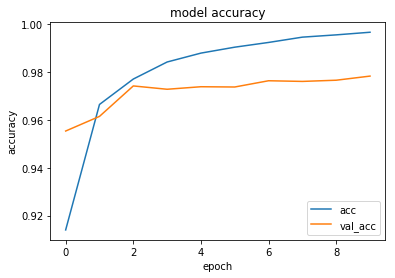

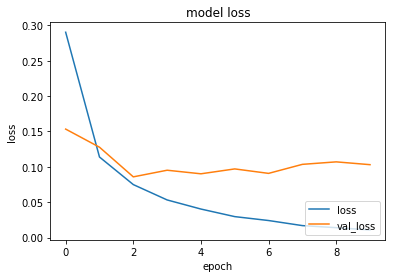

In [14]:
mlp.plot_history(epoch=10)

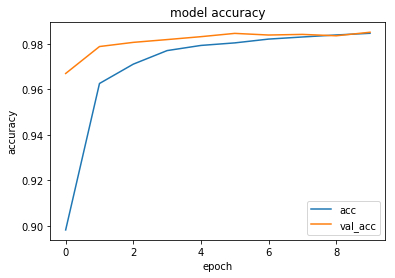

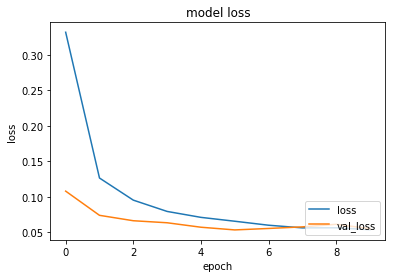

In [15]:
cnn.plot_history(epoch=10)

In [20]:
mlp.evaluate(X_test_mlp,y_test_mlp)

10000/10000 [==============================] - 0s 36us/step


{'loss': 0.09318342915923813, 'acc': 0.9798}

In [21]:
cnn.evaluate(X_test_cnn,y_test_cnn)

10000/10000 [==============================] - 1s 65us/step


{'loss': 0.05047295246360882, 'acc': 0.9858}